# Data Visualization

This notebook loads the CSV files present in the `results` folder and displays several plots using matplotlib and pandas.

/tmp/ipykernel_102162/568132874.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Results directory: /home/ubuntu/SoY-locust/ui/../results
CSV files found: ['SoyMonoShorterIfLogin_3.csv', 'SoyMonoShorterIfLogin_2.csv', 'SoyMonoShorterIfLogin.csv']

--- Data from SoyMonoShorterIfLogin_3.csv ---


,cores,rts,tr,users,replica,util,mem
0,1.0,0.000000,0.000000,NaN,1,0.0,0.0
1,1.0,0.000000,0.000000,0.0,1,0.0,0.0
2,1.0,0.099233,0.030583,1.0,1,0.0,0.0
3,1.0,0.069548,0.071300,2.0,1,0.0,0.0
4,1.0,0.059494,0.150267,4.0,1,0.0,0.0


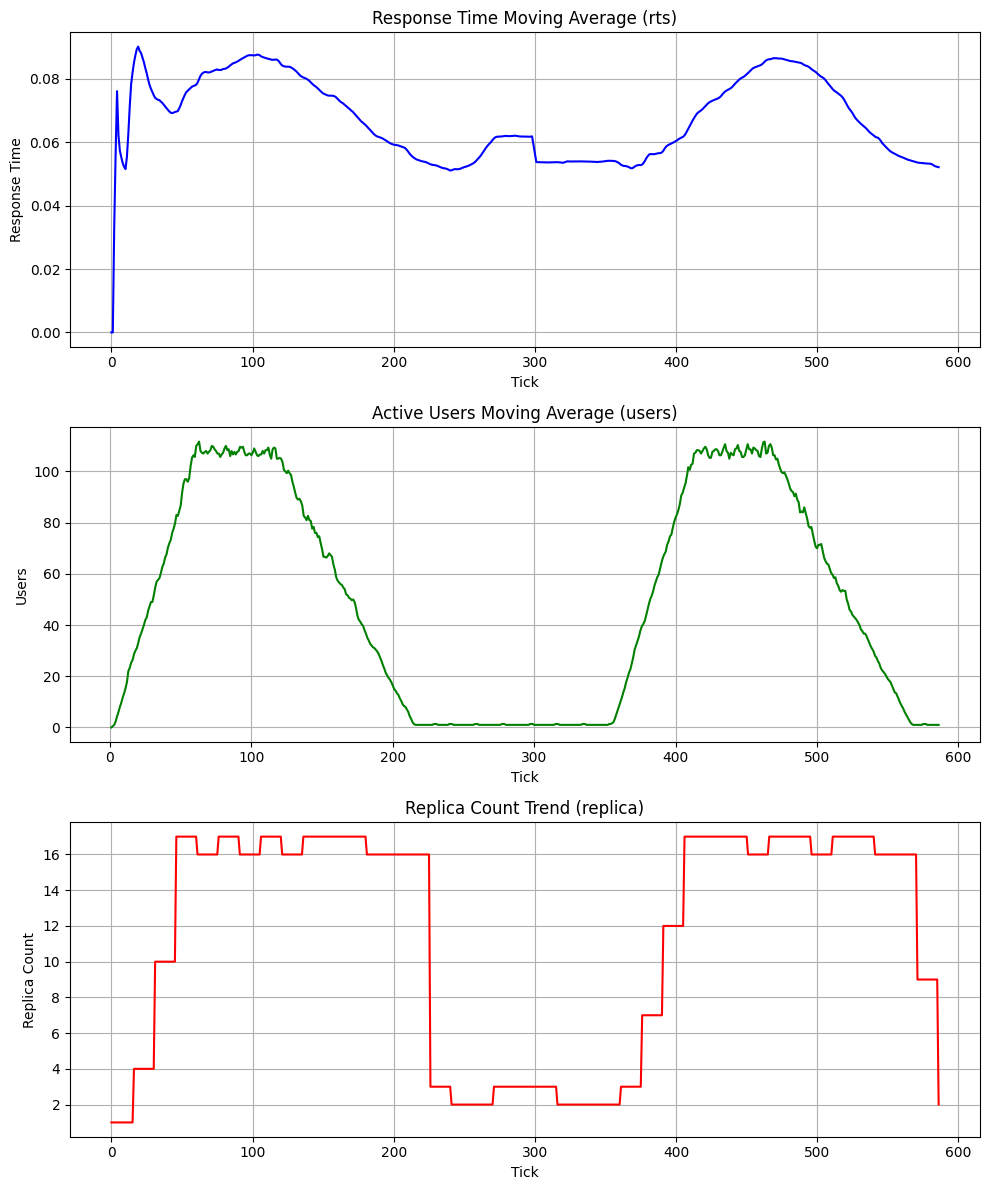


--- Data from SoyMonoShorterIfLogin_2.csv ---


,cores,rts,tr,users,replica,util,mem
0,1.0,0.000000,0.000000,NaN,1,0.0,0.0
1,1.0,0.000000,0.000000,0.0,1,0.0,0.0
2,1.0,0.098307,0.987060,1.0,1,0.0,0.0
3,1.0,0.067054,2.959936,3.0,1,0.0,0.0
4,1.0,0.059239,4.926850,5.0,1,0.0,0.0


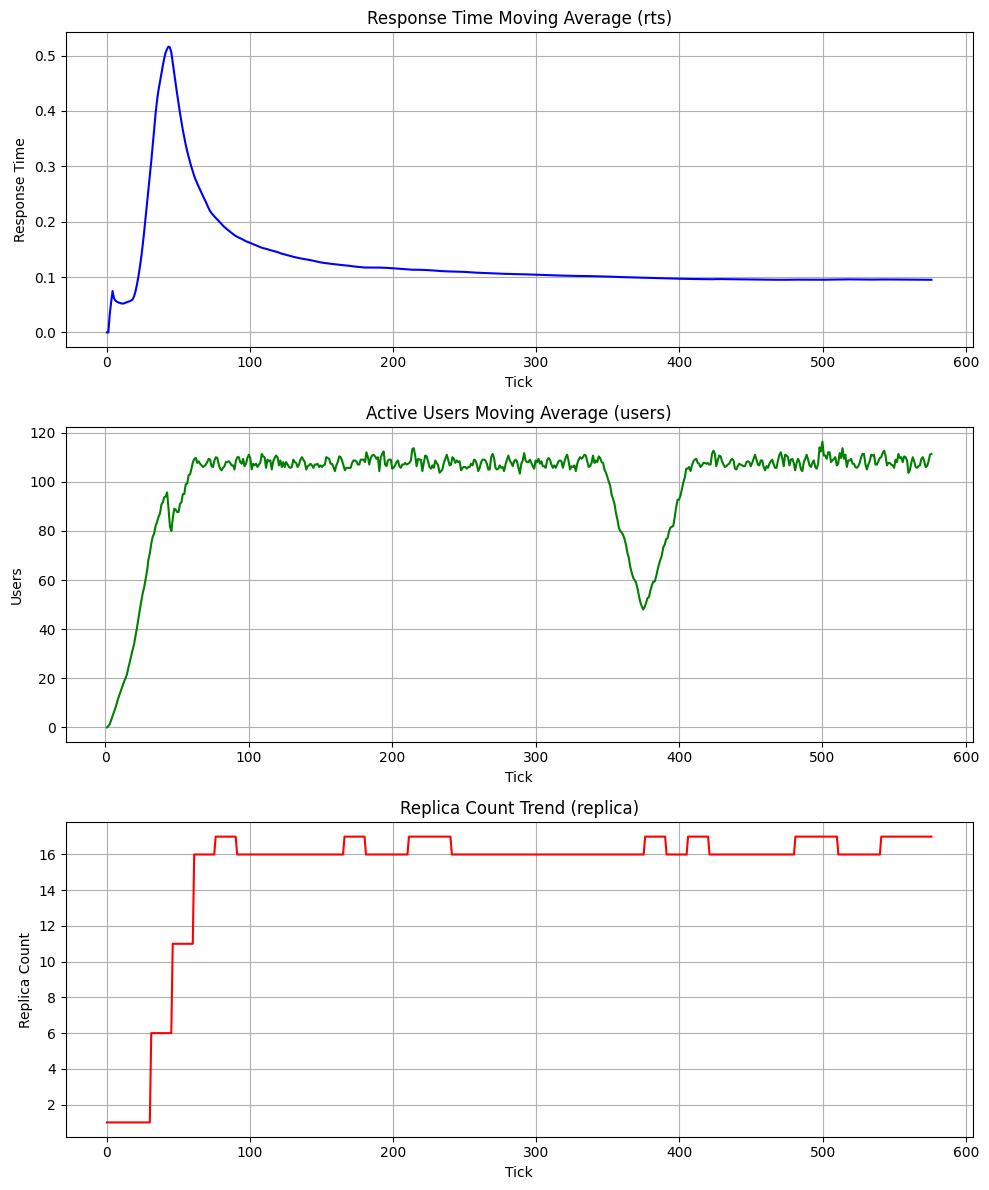


--- Data from SoyMonoShorterIfLogin.csv ---


,cores,rts,tr,users,replica,util,mem
0,1.0,0.0,0.0,NaN,1,0.0,0.0
1,1.0,0.0,0.0,0.0,1,0.0,0.0
2,1.0,0.0,0.0,0.0,1,0.0,0.0
3,1.0,0.0,0.0,0.0,1,0.0,0.0
4,1.0,0.0,0.0,2.0,1,0.0,0.0


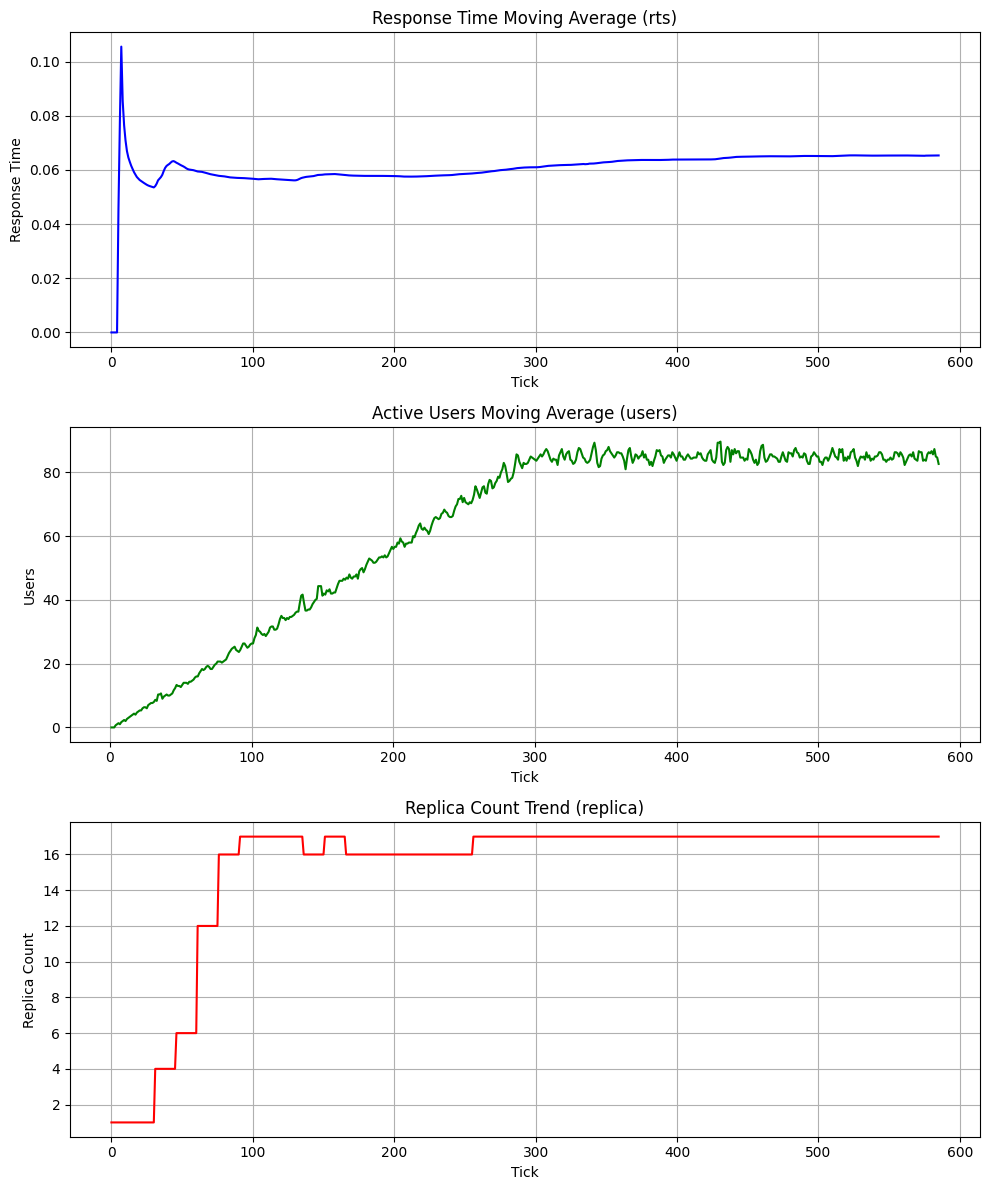

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt


from IPython.core.display import display, HTML
display(HTML("<style>.output_scroll { height: auto; max-height: none; }</style>"))

# Set the path to the results folder (assuming it is one level above the ui folder)
results_dir = os.path.join(os.path.dirname(os.path.abspath('__file__')), '..', 'results')
print('Results directory:', results_dir)

# List CSV files
csv_files = [f for f in os.listdir(results_dir) if f.endswith('.csv')]
print('CSV files found:', csv_files)

# For each file, display a subplot with 3 rows:
# The first plot shows the moving average (window=3) trend of 'rts'
# The second shows the moving average trend of 'users'
# The third shows the trend of 'replica'
for file in csv_files:
    path = os.path.join(results_dir, file)
    df = pd.read_csv(path)
    print(f"\n--- Data from {file} ---")
    display(df.head())
    
    # Compute moving averages for rts and users
    if 'rts' in df.columns:
        rts_smoothed = df['rts'].rolling(window=3, min_periods=1).mean()
    if 'users' in df.columns:
        users_smoothed = df['users'].rolling(window=3, min_periods=1).mean()
    
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 12))
    
    # First plot: rts moving average
    if 'rts' in df.columns:
        axes[0].plot(rts_smoothed, color='blue')
        axes[0].set_title("Response Time Moving Average (rts)")
        axes[0].set_xlabel("Tick")
        axes[0].set_ylabel("Response Time")
        axes[0].grid(True)
    else:
        axes[0].text(0.5, 0.5, "Column 'rts' not found", horizontalalignment='center')
        axes[0].grid(True)
    
    # Second plot: users moving average
    if 'users' in df.columns:
        axes[1].plot(users_smoothed, color='green')
        axes[1].set_title("Active Users Moving Average (users)")
        axes[1].set_xlabel("Tick")
        axes[1].set_ylabel("Users")
        axes[1].grid(True)
    else:
        axes[1].text(0.5, 0.5, "Column 'users' not found", horizontalalignment='center')
        axes[1].grid(True)
    
    # Third plot: replica count (no smoothing)
    if 'replica' in df.columns:
        axes[2].plot(df['replica'], color='red')
        axes[2].set_title("Replica Count Trend (replica)")
        axes[2].set_xlabel("Tick")
        axes[2].set_ylabel("Replica Count")
        axes[2].grid(True)
    else:
        axes[2].text(0.5, 0.5, "Column 'replica' not found", horizontalalignment='center')
        axes[2].grid(True)
    
    plt.tight_layout()
    plt.show()
